In [10]:
import pandas as pd 
import numpy as np

In [12]:
data = pd.read_csv('D:\\Master in Computer science and technology\\sem 2\\Data Science and Machine Learning\\Assingment\\data set\\PatientSurvivalPrediction.csv')

In [13]:
# Display the first few rows to understand the data
data.head()

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,...,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,Unnamed: 83,hospital_death
0,66154,25312,118,68.0,22.73,0,Caucasian,M,180.3,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,NaN,0
1,114252,59342,81,77.0,27.42,0,Caucasian,F,160.0,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,0
2,119783,50777,118,25.0,31.95,0,Caucasian,F,172.7,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,NaN,0
3,79267,46918,118,81.0,22.64,1,Caucasian,F,165.1,Operating Room / Recovery,...,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,NaN,0
4,92056,34377,33,19.0,NaN,0,Caucasian,M,188.0,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,NaN,0


In [14]:
# Remove the unnecessary 'Unnamed: 83' column
data = data.drop(columns=['Unnamed: 83'])

In [15]:
# Check for missing values
missing_values = data.isnull().sum()

In [16]:
# Display the columns with missing values
missing_values[missing_values > 0]

age                            4228
bmi                            3429
ethnicity                      1395
gender                           25
height                         1334
                               ... 
leukemia                        715
lymphoma                        715
solid_tumor_with_metastasis     715
apache_3j_bodysystem           1662
apache_2_bodysystem            1662
Length: 74, dtype: int64

In [18]:
# Impute numerical columns with median
numerical_cols = ['age','bmi','height', 'weight', 'heart_rate_apache','map_apache','resprate_apache', 'temp_apache']
for col in numerical_cols:
    data[col].fillna(data[col].median())

# Impute categorical columns with mode
categorical_cols = ['ethnicity', 'gender', 'apache_2_bodysystem', 'apache_3j_bodysystem']
for col in categorical_cols:
    data[col].fillna(data[col].mode()[0])

In [23]:
# Verify that all missing values are handled
missing_values_post_imputation = data.isnull().sum()
missing_values_post_imputation[missing_values_post_imputation > 0]

age                            4228
bmi                            3429
ethnicity                      1395
gender                           25
height                         1334
                               ... 
leukemia                        715
lymphoma                        715
solid_tumor_with_metastasis     715
apache_3j_bodysystem           1662
apache_2_bodysystem            1662
Length: 74, dtype: int64

In [26]:
# Impute remaining numerical columns with median
remaining_numerical_cols = ['arf_apache', 'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_verbal_apache',
                            'heart_rate_apache', 'map_apache', 'resprate_apache', 'temp_apache', 
                            'hepatic_failure', 'immunosuppression', 'leukemia', 'lymphoma', 'solid_tumor_with_metastasis']
for col in remaining_numerical_cols:
    data[col] = data[col].fillna(data[col].median())

# Impute remaining categorical columns with mode 
remaining_categorical_cols = ['icu_admit_source', 'apache_2_diagnosis', 'apache_3j_diagnosis']
for col in remaining_categorical_cols:
    data[col] = data[col].fillna(data[col].mode()[0])

In [28]:
# Verify that all missing values are handled
missing_values_post_final_imputation = data.isnull().sum()
missing_values_post_final_imputation[missing_values_post_final_imputation > 0]

age                              4228
bmi                              3429
ethnicity                        1395
gender                             25
height                           1334
weight                           2720
gcs_unable_apache                1037
intubated_apache                  715
ventilated_apache                 715
d1_diasbp_max                     165
d1_diasbp_min                     165
d1_diasbp_noninvasive_max        1040
d1_diasbp_noninvasive_min        1040
d1_heartrate_max                  145
d1_heartrate_min                  145
d1_mbp_max                        220
d1_mbp_min                        220
d1_mbp_noninvasive_max           1479
d1_mbp_noninvasive_min           1479
d1_resprate_max                   385
d1_resprate_min                   385
d1_spo2_max                       333
d1_spo2_min                       333
d1_sysbp_max                      159
d1_sysbp_min                      159
d1_sysbp_noninvasive_max         1027
d1_sysbp_non

In [30]:
# Impute remaining vital sign columns with median
vital_sign_cols = [
    'gcs_unable_apache', 'd1_diasbp_max', 'd1_diasbp_min', 'd1_diasbp_noninvasive_max', 'd1_diasbp_noninvasive_min',
    'd1_heartrate_max', 'd1_heartrate_min', 'd1_mbp_max', 'd1_mbp_min', 'd1_mbp_noninvasive_max',
    'd1_mbp_noninvasive_min', 'd1_resprate_max', 'd1_resprate_min', 'd1_spo2_max', 'd1_spo2_min',
    'd1_sysbp_max', 'd1_sysbp_min', 'd1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_min', 'd1_temp_max',
    'd1_temp_min', 'h1_diasbp_max', 'h1_diasbp_min', 'h1_diasbp_noninvasive_max', 'h1_diasbp_noninvasive_min',
    'h1_heartrate_max', 'h1_heartrate_min', 'h1_mbp_max', 'h1_mbp_min', 'h1_mbp_noninvasive_max',
    'h1_mbp_noninvasive_min', 'h1_resprate_max', 'h1_resprate_min', 'h1_spo2_max', 'h1_spo2_min',
    'h1_sysbp_max', 'h1_sysbp_min', 'h1_sysbp_noninvasive_max', 'h1_sysbp_noninvasive_min',
    'd1_glucose_max', 'd1_glucose_min', 'd1_potassium_max', 'd1_potassium_min'
]

for col in vital_sign_cols:
    data[col] = data[col].fillna(data[col].median())

#  Impute remaining medical condition columns with mode
medical_condition_cols = ['aids', 'cirrhosis', 'diabetes_mellitus', 'apache_4a_hospital_death_prob', 'apache_4a_icu_death_prob']

for col in medical_condition_cols:
    data[col] = data[col].fillna(data[col].mode()[0])

# Impute remaining categorical columns with mode 
remaining_categorical_cols = ['intubated_apache', 'ventilated_apache']

for col in remaining_categorical_cols:
    data[col] = data[col].fillna(data[col].mode()[0])

In [32]:
# Verify that all missing values are handled
missing_values_final_check = data.isnull().sum()
missing_values_final_check[missing_values_final_check > 0]

age                     4228
bmi                     3429
ethnicity               1395
gender                    25
height                  1334
weight                  2720
apache_3j_bodysystem    1662
apache_2_bodysystem     1662
dtype: int64

In [34]:
# data distribution 
import matplotlib.pyplot as plt
import seaborn as sns 

#  Plotting Histograms for ALL Numerical Features
numerical_features = data.select_dtypes(include=['float64','int64']).columns.tolist()


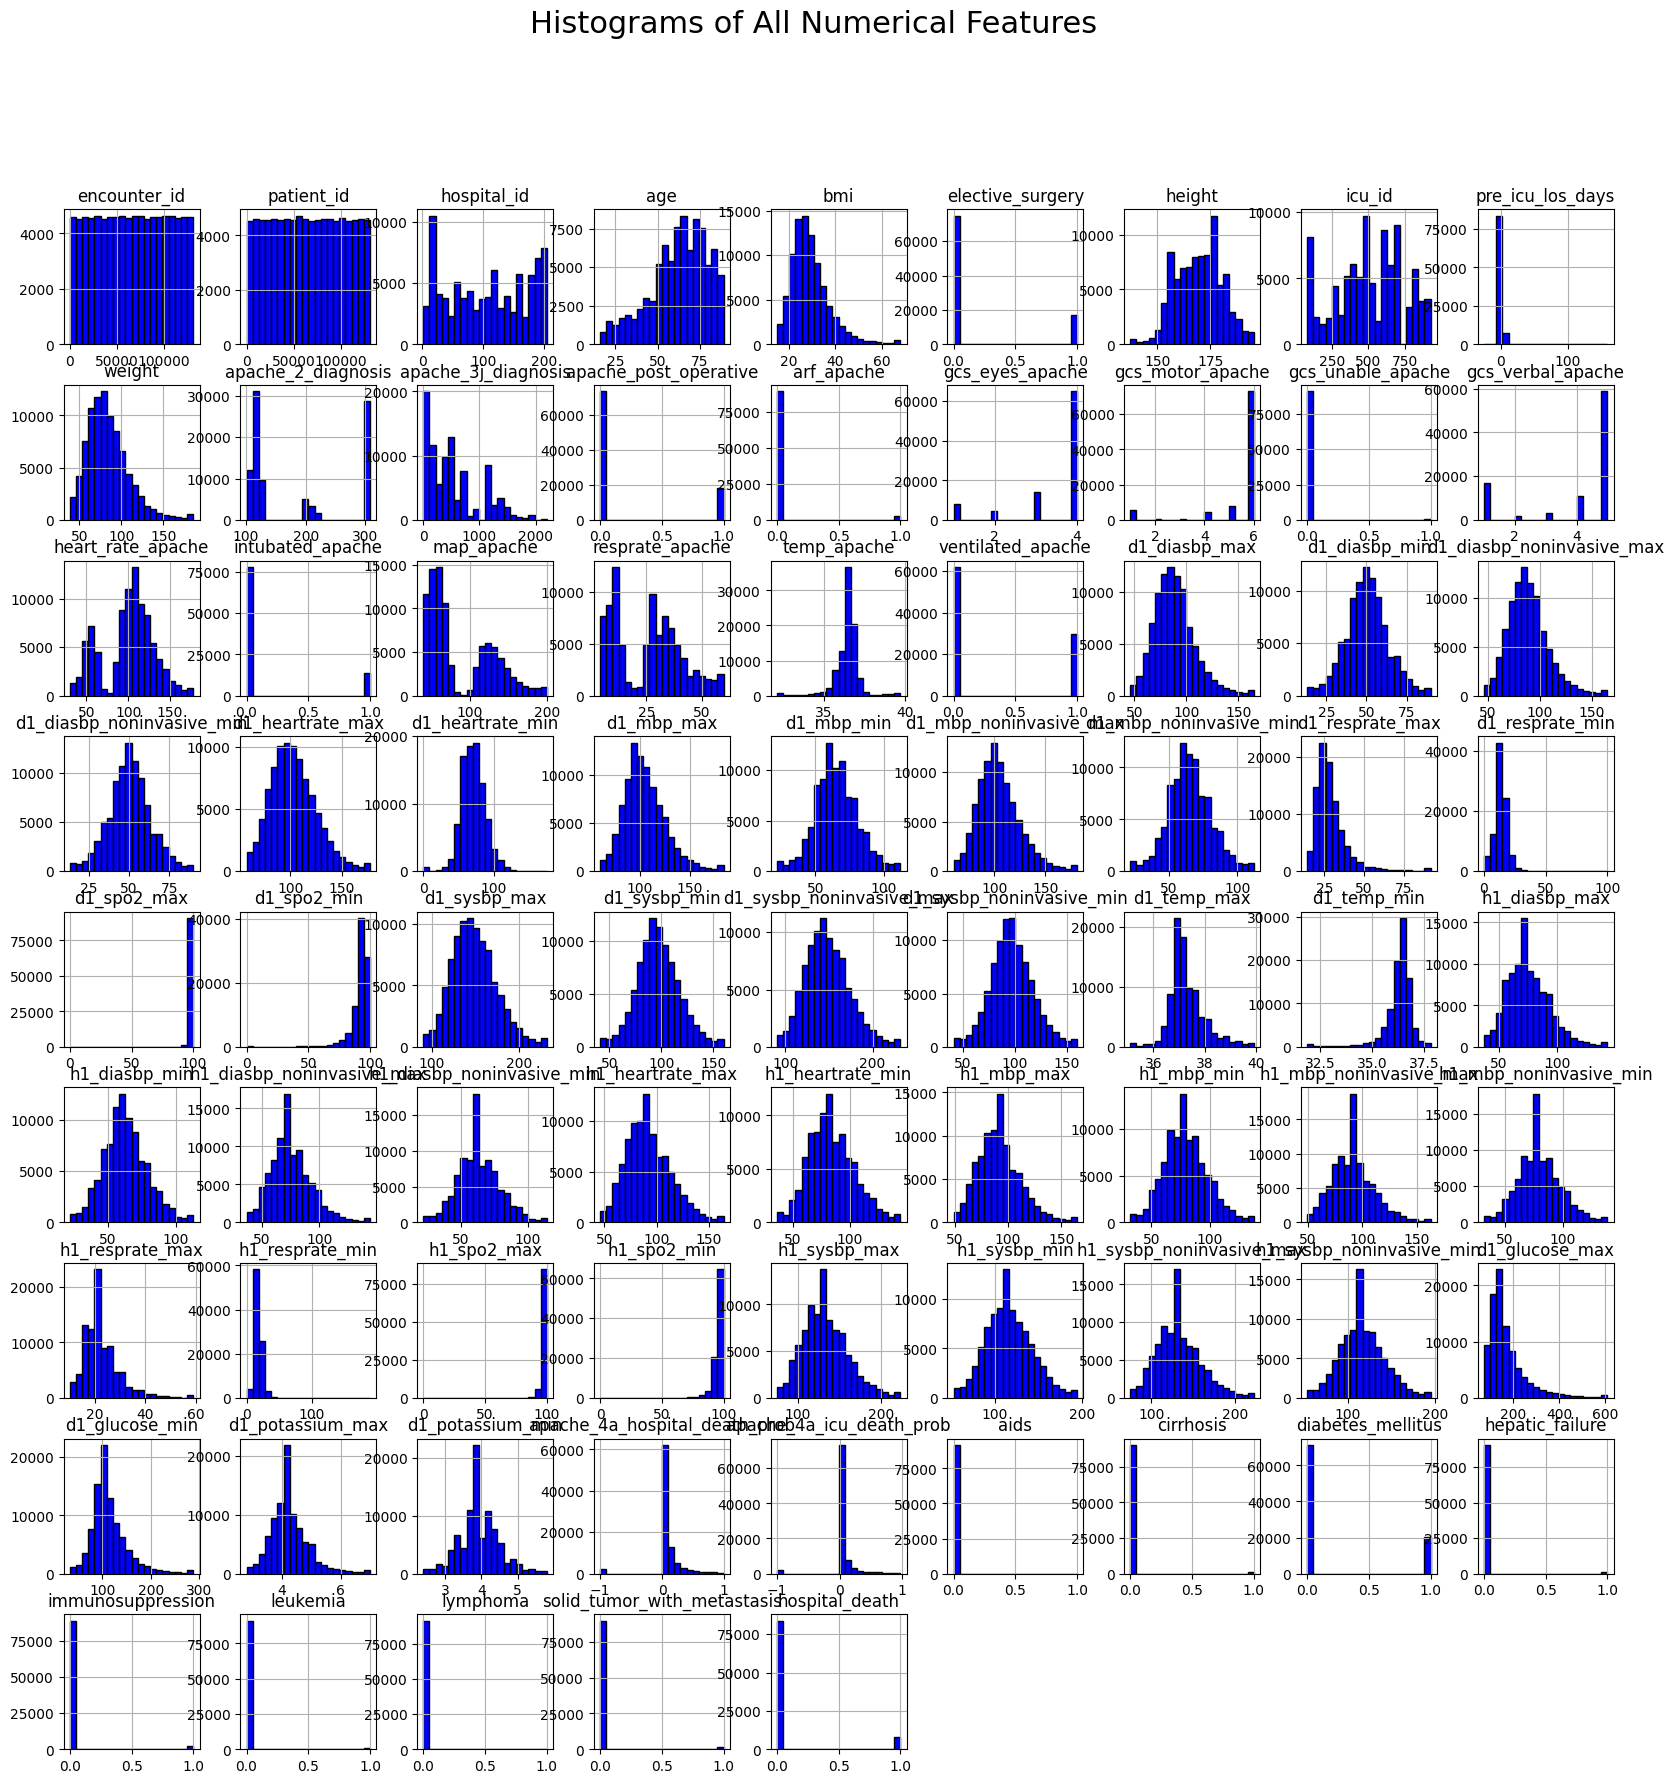

In [35]:
# Plot histograms for all numerical features
data[numerical_features].hist(figsize=(20,20), bins=20, color= 'blue',  edgecolor='black')
plt.suptitle('Histograms of All Numerical Features', fontsize=22)
plt.show()

In [36]:
# Correlation Matrix (for Numerical Features)
correlation_matrix = data[numerical_features].corr()


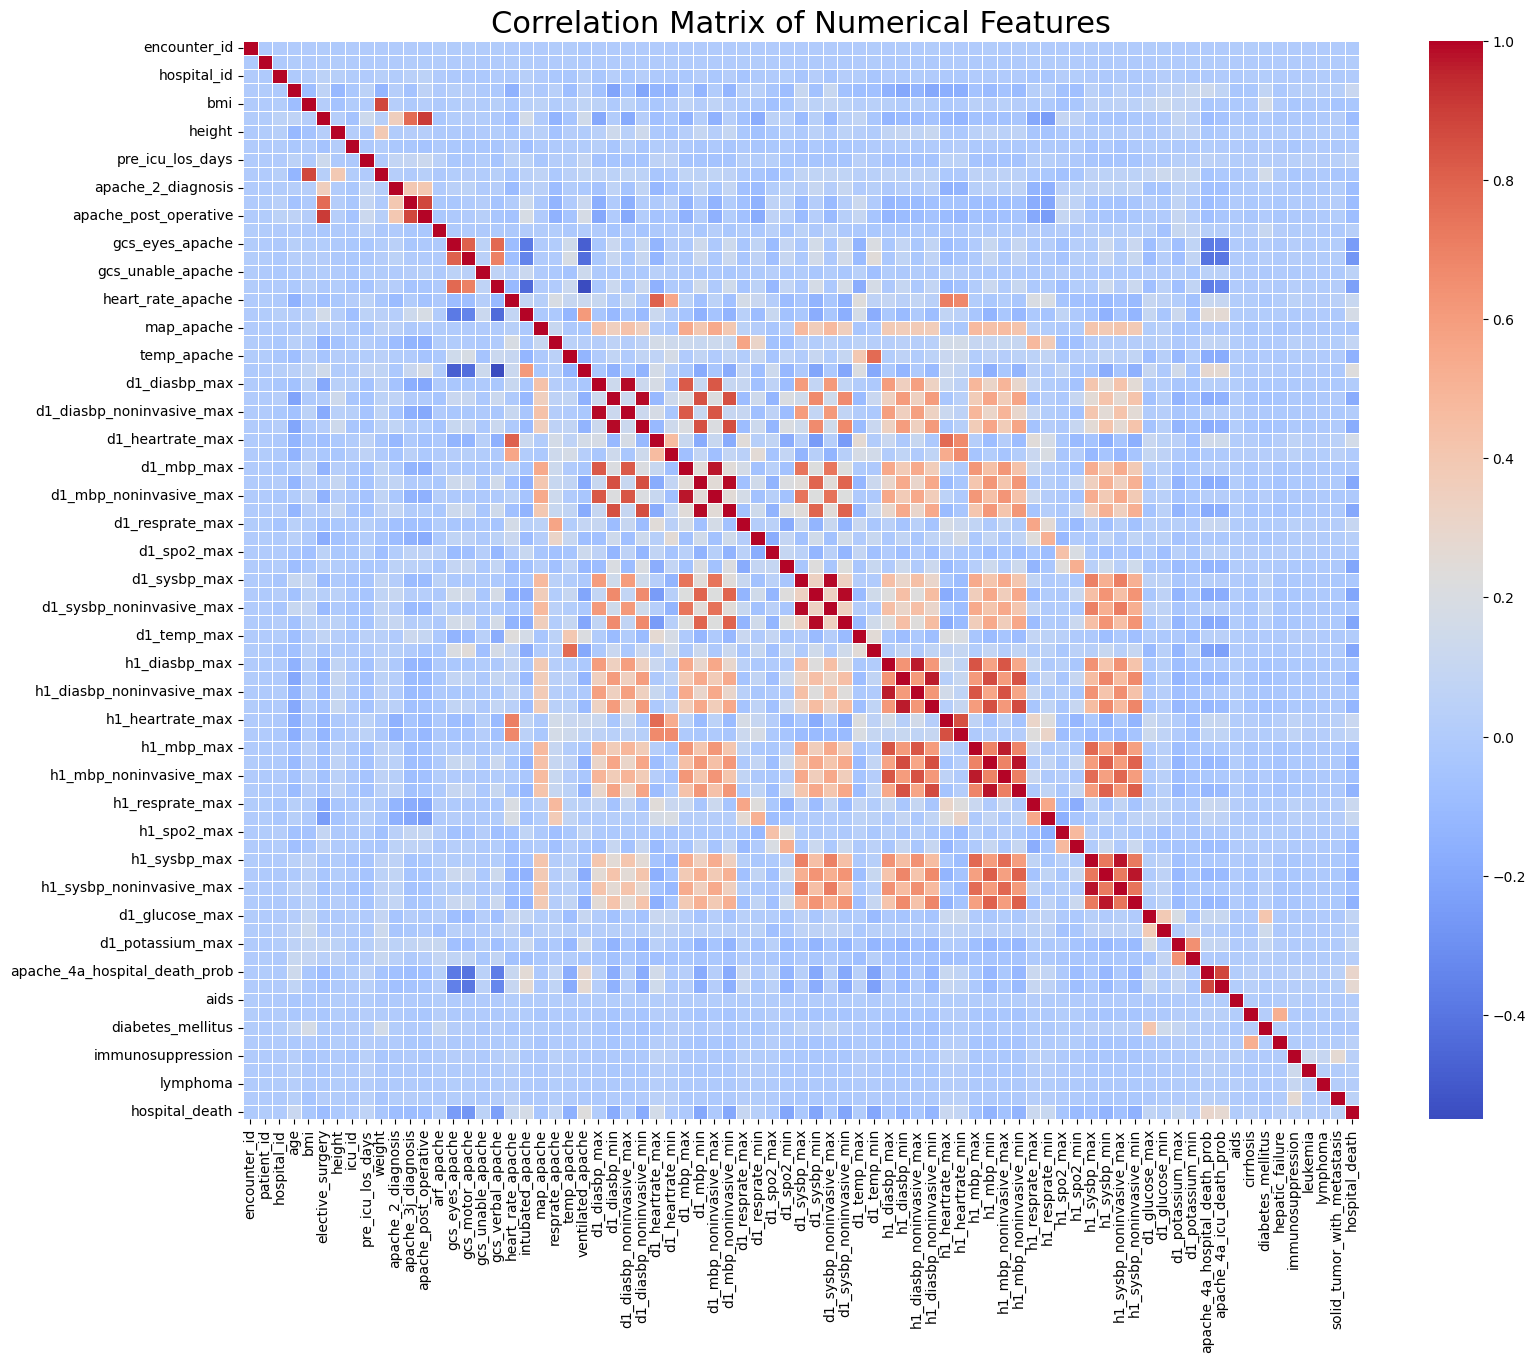

In [37]:
# Plot the heatmap of correlation
plt.figure(figsize=(18,14))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features', fontsize=22)
plt.show()

In [38]:
# Categorical Feature Analysis
categorical_features = data.select_dtypes(include=['object']).columns.tolist()


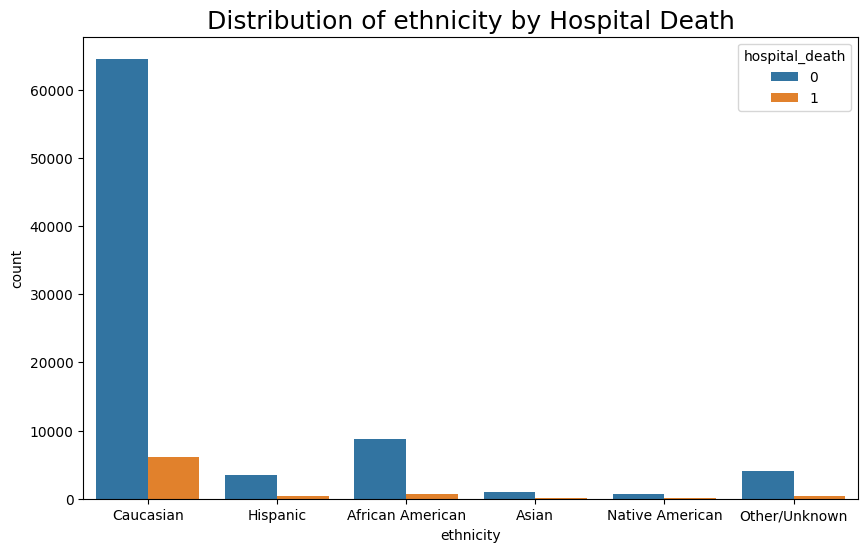

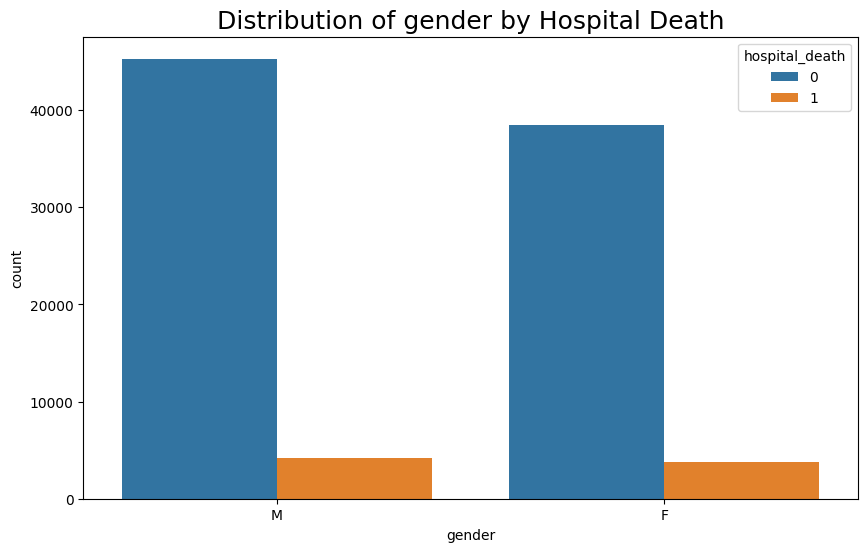

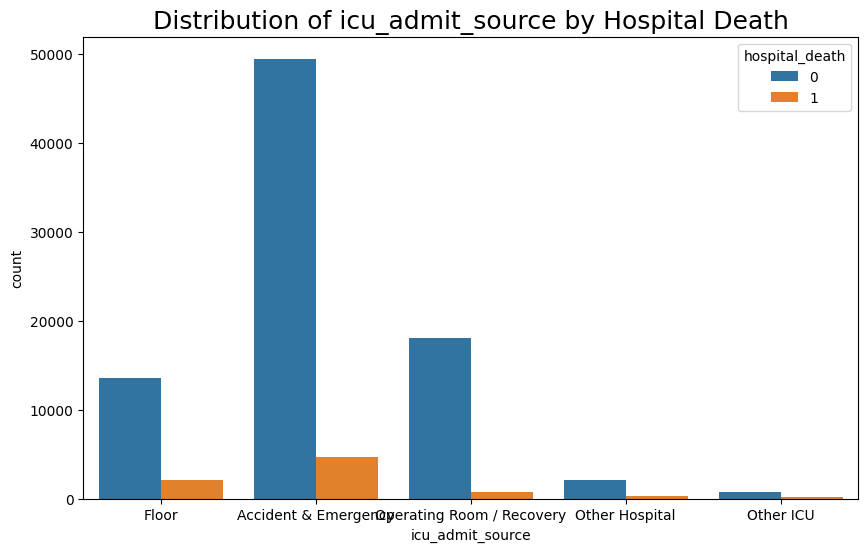

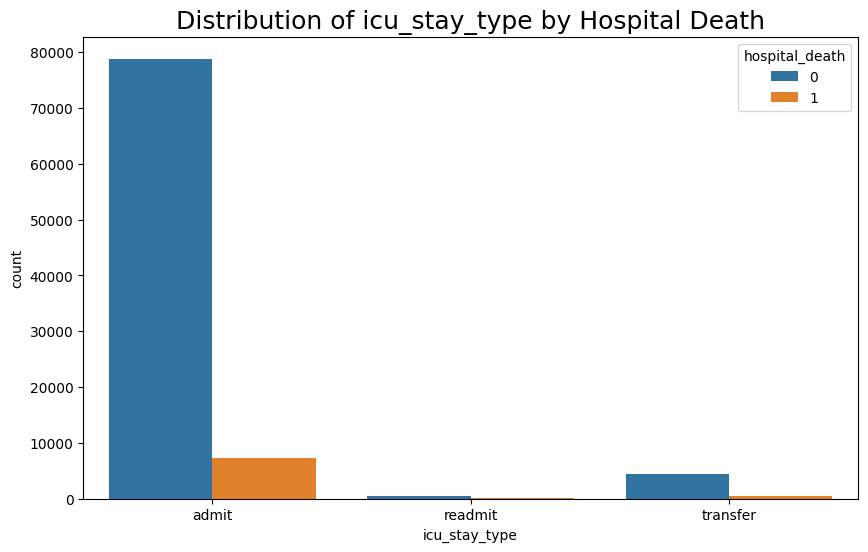

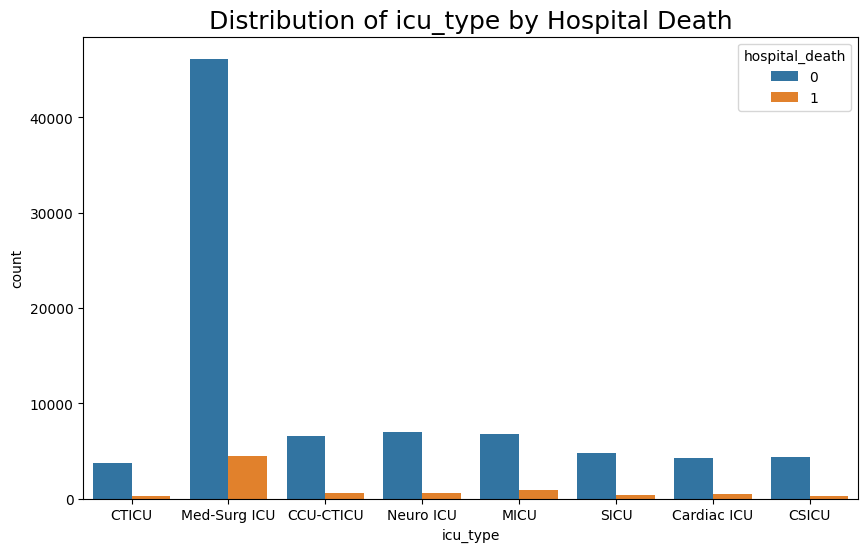

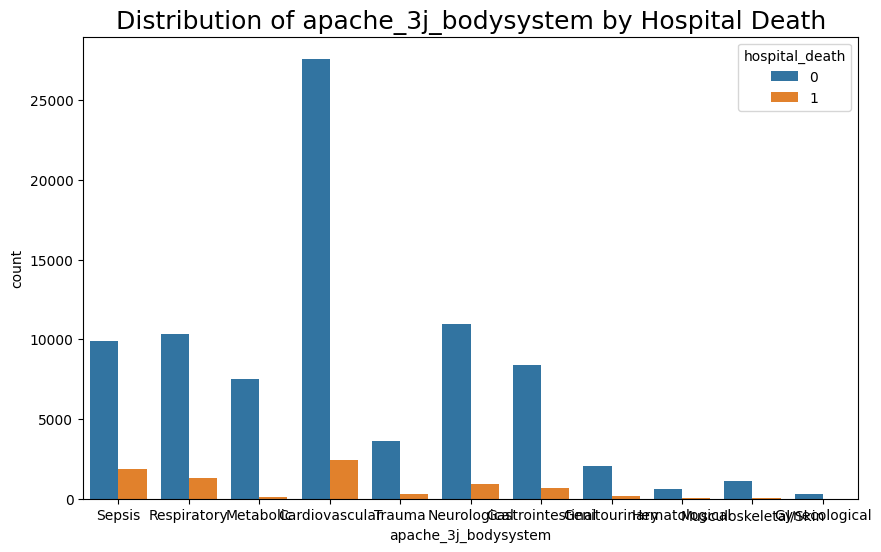

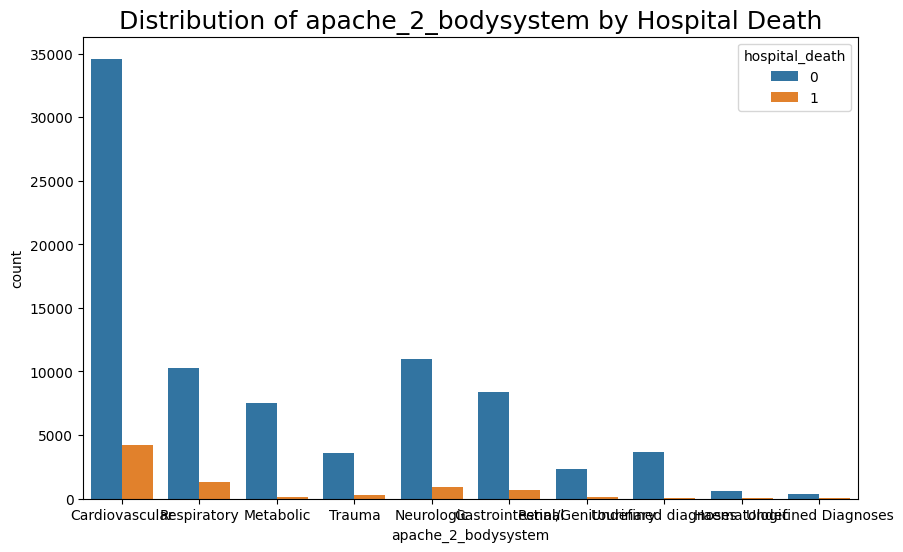

In [39]:
# Plot countplots for each categorical feature
for feature in categorical_features:
    plt.figure(figsize=(10,6))
    sns.countplot(data=data, x=feature, hue='hospital_death' )
    plt.title(f'Distribution of {feature} by Hospital Death', fontsize=18)
    plt.show()

In [40]:
# Scatter Plots for Feature Relationships
key_features = ['age', 'bmi', 'heart_rate_apache', 'temp_apache', 'gcs_eyes_apache']


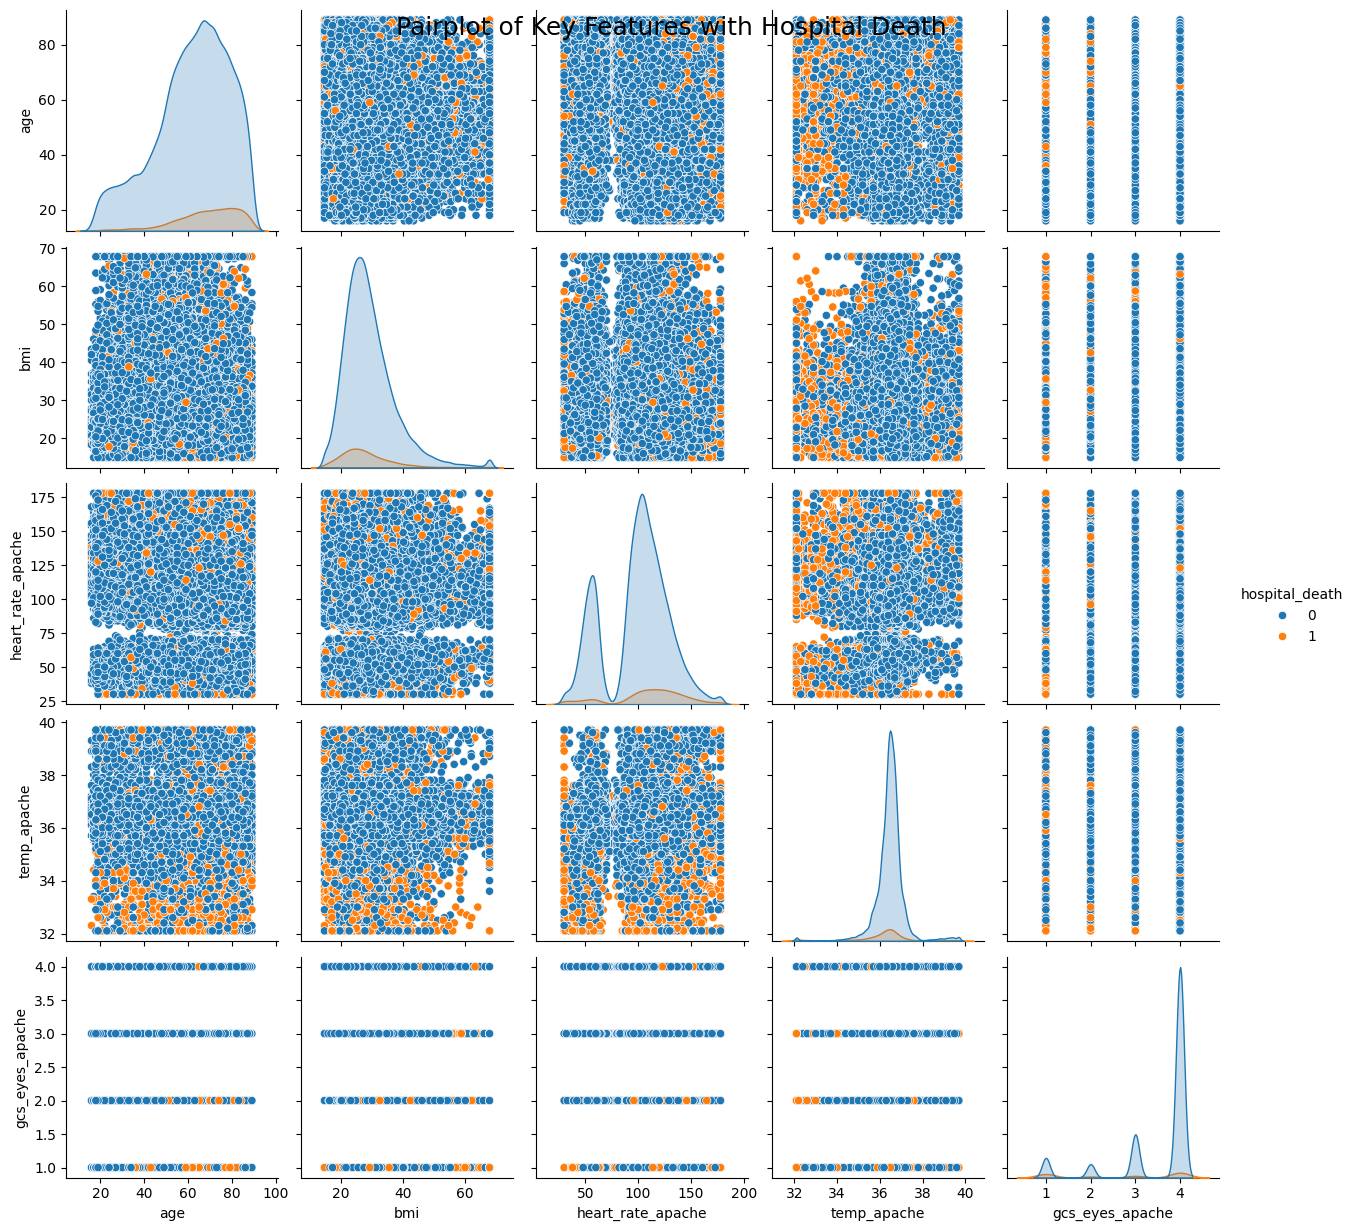

In [41]:
# Pairplot for relationships
sns.pairplot(data[key_features + ['hospital_death']], hue='hospital_death', diag_kind='kde')
plt.suptitle('Pairplot of Key Features with Hospital Death', fontsize=18)
plt.show()

In [42]:
# Feature Selection and Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, roc_curve


In [43]:
!pip install xgboost



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [44]:
import xgboost as xgb

In [45]:
# Selected features based on EDA
selected_features = [
    'age', 'bmi', 'apache_4a_hospital_death_prob', 'apache_4a_icu_death_prob',
    'heart_rate_apache', 'temp_apache', 'gcs_eyes_apache', 'ethnicity', 'icu_type', 'gender'
]

In [46]:
# Split data into features and target
X = data[selected_features]
y = data['hospital_death']

In [47]:
# Handle categorical variables
categorical_features = ['ethnicity', 'icu_type', 'gender']


In [48]:
# Define preprocessing for numerical and categorical data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


In [49]:
# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, [col for col in selected_features if col not in categorical_features]),
        ('cat', categorical_transformer, categorical_features)
    ])


In [50]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
# Model Training and Evaluation
# Logistic Regression Model
logreg = Pipeline(steps=[('preprocessor', preprocessor),
                         ('classifier', LogisticRegression())])
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_logreg))


Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96     16756
           1       0.62      0.19      0.28      1587

    accuracy                           0.92     18343
   macro avg       0.77      0.59      0.62     18343
weighted avg       0.90      0.92      0.90     18343



In [53]:
# Random Forest Model
rf = Pipeline(steps=[('preprocessor', preprocessor),
                     ('classifier', RandomForestClassifier())])
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96     16756
           1       0.61      0.21      0.32      1587

    accuracy                           0.92     18343
   macro avg       0.77      0.60      0.64     18343
weighted avg       0.90      0.92      0.90     18343



In [54]:
# XGBoost Model
xgboost = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'))])
xgboost.fit(X_train, y_train)
y_pred_xgb = xgboost.predict(X_test)
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))

C:\Users\Vandan Prajapati\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:10:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.96     16756
           1       0.57      0.23      0.33      1587

    accuracy                           0.92     18343
   macro avg       0.75      0.61      0.64     18343
weighted avg       0.90      0.92      0.90     18343



In [55]:
# Model Evaluation
# ROC-AUC for each model
for model, y_pred in zip([logreg, rf, xgboost], [y_pred_logreg, y_pred_rf, y_pred_xgb]):
    roc_auc = roc_auc_score(y_test, y_pred)
    print(f"ROC-AUC for {model.named_steps['classifier'].__class__.__name__}: {roc_auc}")

ROC-AUC for LogisticRegression: 0.5871668687592538
ROC-AUC for RandomForestClassifier: 0.6001044608836147
ROC-AUC for XGBClassifier: 0.606986533278038


In [56]:
# Logistic Regression with class weighting
logreg_weighted = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('classifier', LogisticRegression(class_weight='balanced'))])
logreg_weighted.fit(X_train, y_train)
y_pred_logreg_weighted = logreg_weighted.predict(X_test)
print("Logistic Regression with Class Weighting Classification Report:\n", classification_report(y_test, y_pred_logreg_weighted))

Logistic Regression with Class Weighting Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.77      0.86     16756
           1       0.22      0.69      0.33      1587

    accuracy                           0.76     18343
   macro avg       0.59      0.73      0.59     18343
weighted avg       0.90      0.76      0.81     18343



In [57]:
# Random Forest with class weighting
rf_weighted = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', RandomForestClassifier(class_weight='balanced'))])
rf_weighted.fit(X_train, y_train)
y_pred_rf_weighted = rf_weighted.predict(X_test)
print("Random Forest with Class Weighting Classification Report:\n", classification_report(y_test, y_pred_rf_weighted))


Random Forest with Class Weighting Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96     16756
           1       0.63      0.20      0.31      1587

    accuracy                           0.92     18343
   macro avg       0.78      0.60      0.63     18343
weighted avg       0.90      0.92      0.90     18343



In [58]:
# Evaluate ROC-AUC for the weighted models
for model, y_pred in zip([logreg_weighted, rf_weighted], [y_pred_logreg_weighted, y_pred_rf_weighted]):
    roc_auc = roc_auc_score(y_test, y_pred)
    print(f"ROC-AUC for {model.named_steps['classifier'].__class__.__name__} with Class Weighting: {roc_auc}")

ROC-AUC for LogisticRegression with Class Weighting: 0.7292076473880718
ROC-AUC for RandomForestClassifier with Class Weighting: 0.5951197046966257


In [69]:
# let's make pridiction
new_patient_data = {
    'age': 80,
    'bmi': 40,
    'apache_4a_hospital_death_prob': 0.05,
    'apache_4a_icu_death_prob': 0.03,
    'heart_rate_apache': 75,
    'temp_apache': 37.0,
    'gcs_eyes_apache': 4,
    'ethnicity': 'Caucasian',
    'icu_type': 'Med/Surg ICU',
    'gender': 'male'
}


In [70]:
# Convert the dictionary to a DataFrame
new_patient_df = pd.DataFrame([new_patient_data])

In [87]:
# Make a prediction
prediction = logreg_weighted.predict(new_patient_df)
prediction_prob = logreg_weighted.predict_proba(new_patient_df)[:, 1]

# Display the results
print(f"Prediction: {'Die' if prediction[0] == 1 else 'Survive'}")
print(f"Probability of Death: {prediction_prob[0]:.2f}")

Prediction: Survive
Probability of Death: 0.35


In [1]:
git init

SyntaxError: invalid syntax (2830201818.py, line 1)